In [75]:
import numpy as np
import pandas as pd
import requests
import io
import os.path
import csv
from os import getcwd
import seaborn as sns

In [63]:
print("Welcome to Raffa's Notebook")

Welcome to Raffa's Notebook


"Raw" functions to get data and save in download directory

In [62]:
def download_data():
    url = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Agricultural%20total%20factor%20productivity%20(USDA)/Agricultural%20total%20factor%20productivity%20(USDA).csv"
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

download_data()

def savefile():
    #save_path = os.getcwd()
    if not os.path.exists("downloads"):
        os.makedirs("downloads") #create directory called downloads
    if not os.path.isfile("downloads/Dataset.csv"):
        save_path = os.getcwd()
        url = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Agricultural%20total%20factor%20productivity%20(USDA)/Agricultural%20total%20factor%20productivity%20(USDA).csv"
        download = requests.get(url).content
        #download_bytes = bytes(download, 'utf-8')
        directory = getcwd()
        filename = directory + '/downloads/Dataset.csv'
        r = requests.get(url)

        f = open(filename,'w')
        encoding = 'utf-8'
        down = download.decode(encoding)
        f.write(down)
    else:
        print("the path and file already exists") #add file check
        
savefile()

the path and file already exists


Final method to get data and save in download directory

In [74]:
def download_save_data(url):
    
    #download data into dataframe part of the method
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8'))) #need to save into self.df
    
    #check directory and save file part of the method
    if not os.path.exists("downloads"):
        os.makedirs("downloads") #create directory called downloads
    if not os.path.isfile("downloads/Dataset.csv"):
        directory = getcwd()
        filename = directory + '/downloads/Dataset.csv'
        
        f = open(filename,'w')
        encoding = 'utf-8'
        down = download.decode(encoding)
        f.write(down)
        print("The file has been stored in the downloads directory with the name Dataset.csv")
    else:
        print("The path and file already exist")

url = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Agricultural%20total%20factor%20productivity%20(USDA)/Agricultural%20total%20factor%20productivity%20(USDA).csv"        
download_save_data(url)

The path and file already exist


In [79]:
df = download_data()
df.head()

Entity  Year      tfp   output   inputs  ag_land_index  labor_index  \
0  Afghanistan  1961  65.0814  44.8285  68.8807        91.6812      44.5145   
1  Afghanistan  1962  64.0637  45.6182  71.2075        92.2016      45.0207   
2  Afghanistan  1963  61.6217  45.9729  74.6051        92.6352      45.5528   
3  Afghanistan  1964  65.1109  49.0775  75.3752        93.1816      46.1108   
4  Afghanistan  1965  63.8587  51.2121  80.1960        93.1990      46.6948   

   capital_index  materials_index  output_quantity  ...  ag_land_quantity  \
0       141.5215          35.9132          2566730  ...             10571   
1       163.6547          36.3829          2611942  ...             10631   
2       202.0577          37.0801          2632254  ...             10681   
3       203.8875          37.5294          2810010  ...             10744   
4       270.9746          38.5949          2932230  ...             10746   

   labor_quantity  capital_quantity  machinery_quantity  livestock_quantity  \
0            1704              8866                   5                6339   
1            1723             10253                   6                6228   
2            1743             12659                   8                6547   
3            1765             12773                   8                6732   
4            1787             16976                  12                6946   

   fertilizer_quantity  animal_feed_quantity  cropland_quantity  \
0                57345               2068912               7700   
1                58146               2082012               7760   
2                59694               2007829               7810   
3                60006               2140272               7873   
4                61821               2171226               7875   

   pasture_quantity  irrigation_quantity  
0             30000                 2380  
1             30000                 2380  
2             30000                 2380  
3             30000                 2380  
4             30000                 2380  

[5 rows x 23 columns]

Method 6: Gapminder

In [73]:
#!pip install seaborn

In [80]:
class RaffaGraph:
    
    def __init__(self, method = 6):
        self.method = method
    
    #relevant method below
    def gapminder(self, year: int):
        if type(year) != int:
            raise TypeError("Variable 'year' is not int")
        sns.set_theme(style="white")
        sns.relplot(x="fertilizer_quantity", y="output_quantity", hue=year, size="irrigation_quantity",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [81]:
df.head()
df.describe()

Year           tfp        output        inputs  ag_land_index  \
count  12182.000000  12182.000000  12182.000000  12182.000000   12182.000000   
mean    1990.452225     85.034204     69.855250     83.098867      91.109252   
std       17.071525     29.359555     33.016545     33.656404      31.582940   
min     1961.000000      8.169600      3.259300      1.291900       7.192400   
25%     1976.000000     66.892625     42.721925     57.441725      75.370125   
50%     1991.000000     83.260550     70.382000     85.782950      96.241900   
75%     2005.000000     99.628425     95.665225    101.712100     104.328075   
max     2019.000000    401.810000    231.017100    264.651900     622.664200   

        labor_index  capital_index  materials_index  output_quantity  \
count  12182.000000   12182.000000     12182.000000     1.218200e+04   
mean     120.246137      70.712611        74.456554     6.542024e+07   
std       94.722016      35.177249        61.568852     2.580072e+08   
min        6.620900       0.361300         0.030300     5.367000e+03   
25%       71.991650      43.835950        34.044175     9.864915e+05   
50%       98.763350      71.140800        70.613500     4.124253e+06   
75%      127.240975      96.596500       100.000000     1.860507e+07   
max     1108.744200     443.557200      1245.424600     4.201748e+09   

       crop_output_quantity  ...  ag_land_quantity  labor_quantity  \
count          1.218200e+04  ...      1.218200e+04    1.218200e+04   
mean           4.006052e+07  ...      5.388450e+04    2.555985e+04   
std            1.591937e+08  ...      1.907819e+05    1.086341e+05   
min            5.000000e+01  ...      2.000000e+00    1.000000e+00   
25%            5.258850e+05  ...      8.350000e+02    2.190000e+02   
50%            2.375536e+06  ...      3.558500e+03    1.114500e+03   
75%            1.114921e+07  ...      1.604200e+04    5.017000e+03   
max            2.540194e+09  ...      2.178532e+06    1.057446e+06   

       capital_quantity  machinery_quantity  livestock_quantity  \
count      1.218200e+04        1.218200e+04        1.218200e+04   
mean       9.898867e+04        4.486205e+04        4.970279e+04   
std        3.803203e+05        2.005774e+05        1.842846e+05   
min        1.000000e+00        0.000000e+00        3.000000e+00   
25%        7.080000e+02        6.400000e+01        9.042500e+02   
50%        4.443500e+03        6.970000e+02        3.759000e+03   
75%        2.810450e+04        7.270500e+03        1.580225e+04   
max        6.166273e+06        2.906565e+06        2.281743e+06   

       fertilizer_quantity  animal_feed_quantity  cropland_quantity  \
count         1.218200e+04          1.218200e+04       1.218200e+04   
mean          4.139921e+06          8.245834e+07       4.040027e+04   
std           1.617579e+07          3.188277e+08       1.414526e+05   
min           1.200000e+01          1.070000e+02       0.000000e+00   
25%           1.991875e+04          4.546075e+05       6.142500e+02   
50%           1.487130e+05          3.145580e+06       2.594000e+03   
75%           9.756272e+05          2.297098e+07       1.244575e+04   
max           2.174210e+08          4.819337e+09       1.577808e+06   

       pasture_quantity  irrigation_quantity  
count      1.218200e+04         12182.000000  
mean       8.774184e+04          6993.843047  
std        3.150928e+05         27774.138414  
min        0.000000e+00             0.000000  
25%        5.300000e+02            21.000000  
50%        4.000000e+03           200.000000  
75%        3.000000e+04          1699.250000  
max        3.346286e+06        335404.000000  

[8 rows x 22 columns]

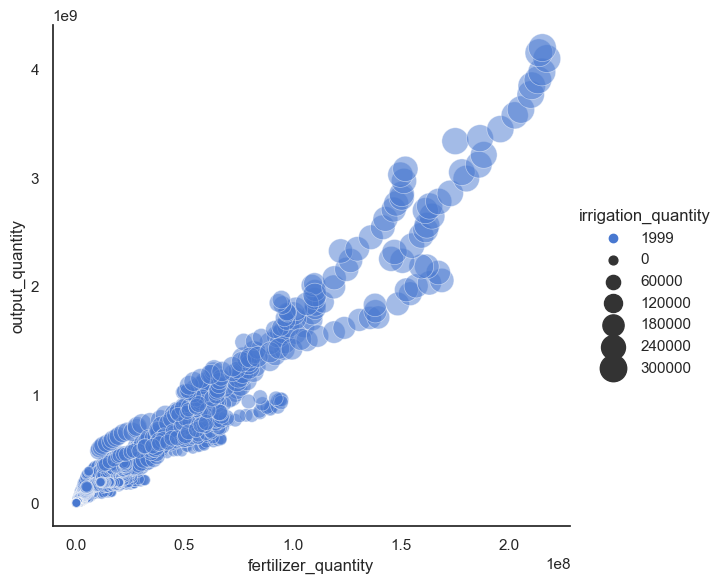

In [82]:
graph = RaffaGraph()
graph.gapminder(1999)

The world agricultural production shows a different pattern based on the country considered and the year under consideration. First of all, we see how countries that use more fertilizers have a higher output quantity. We used the variable "irrigation_quantity" to check whether a higher use of fertilizers is accompagnied with a higher or lower amount of water used in the country. As shown in the graph, the amount of water used is higher. Nonetheless, this variable is absolute and we would need to compare it to overall land to have a more result.

[OPTIONAL] (to do): 
make a variable irrigation_quantity/total land and plot the graph with dot size equal to the ratio.
